## Import Necessary Libraries

In [197]:
import numpy as np
import keras
from  keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import os
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import scikitplot
from scikitplot.metrics import plot_confusion_matrix

#Create a Dataframe for reading and analysing the text files easily

In [92]:
df_train = pd.read_csv('/content/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('/content/val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [40]:
df_train.Sentiment.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

## Reading the Train and Validation Data

In [91]:
X=df_train['Input']


In [69]:
lst=[]
for i in X:
  lst.append(len(i))


In [70]:
len1=pd.DataFrame(lst)
len1.describe()

,0
count,16000.000000
mean,96.845812
std,55.904953
min,7.000000
25%,53.000000
50%,86.000000
75%,129.000000
max,300.000000


In [123]:
cts=[]
for i in range(7,301):
   ct=0
   for k in lst:
     if k==i:
       ct+=1
   cts.append(ct)

#Trying to fix a length for the embedding layers' input

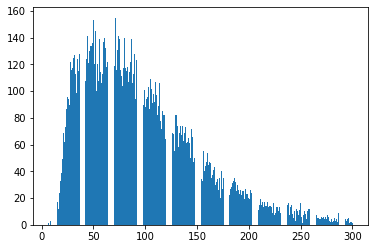

In [130]:
plt.bar(range(7,301),cts)
plt.show()

#Using The tokenizer Class to convert the sentences into word vectors

In [87]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(X)

In [88]:
len(tokenizer.word_index)

15213

In [89]:
X_train=tokenizer.texts_to_sequences(X)
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [93]:
df_train['Sentiment']=df_train.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [94]:
Y_train=df_train['Sentiment'].values


#One hot Encoding the Emotion Values

In [95]:
Y_train_f=to_categorical(Y_train)

In [96]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [97]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [98]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [99]:
Y_val_f=to_categorical(Y_val)

In [100]:
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [182]:
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout


#Creating a Model

In [155]:
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 80, 64)            973568    
_________________________________________________________________
dropout_6 (Dropout)          (None, 80, 64)            0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_13 (Bidirectio (None, 320)               410880    
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


#Compiling and running the model

In [156]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [157]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 14s 28ms/step - loss: 1.2101 - accuracy: 0.5326 - val_loss: 0.6482 - val_accuracy: 0.7805
Epoch 2/12
500/500 [==============================] - 13s 25ms/step - loss: 0.4587 - accuracy: 0.8410 - val_loss: 0.2860 - val_accuracy: 0.9020
Epoch 3/12
500/500 [==============================] - 13s 26ms/step - loss: 0.2675 - accuracy: 0.9056 - val_loss: 0.2016 - val_accuracy: 0.9200
Epoch 4/12
500/500 [==============================] - 13s 26ms/step - loss: 0.1887 - accuracy: 0.9324 - val_loss: 0.2256 - val_accuracy: 0.9175
Epoch 5/12
500/500 [==============================] - 13s 26ms/step - loss: 0.1613 - accuracy: 0.9417 - val_loss: 0.1885 - val_accuracy: 0.9260
Epoch 6/12
500/500 [==============================] - 13s 26ms/step - loss: 0.1290 - accuracy: 0.9516 - val_loss: 0.1870 - val_accuracy: 0.9185
Epoch 7/12
500/500 [==============================] - 13s 26ms/step - loss: 0.1102 - accuracy: 0.9584 - val_loss: 0.1646 - val_accuracy:

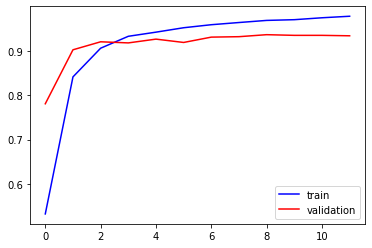

In [168]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

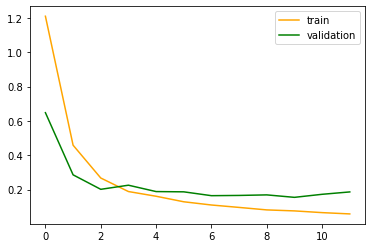

In [169]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

#Checking for Test Data

In [105]:
X_test=df_test['Input']
Y_test=df_test.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [106]:
X_test_f=tokenizer.texts_to_sequences(X_test)
X_test_pad=pad_sequences(X_test_f,maxlen=80,padding='post')

In [107]:
Y_test_f=to_categorical(Y_test)

In [108]:
X_test_pad.shape

(2000, 80)

In [109]:
Y_test_f[:7]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

#Accuracy for Test Data

In [187]:
model.evaluate(X_test_pad,Y_test_f)

63/63 [==============================] - 1s 10ms/step - loss: 0.1803 - accuracy: 0.9370


[0.1803499460220337, 0.9369999766349792]

#Plotting the Confusion matrix 

In [188]:
Y_pred=model.predict_classes(X_test_pad)

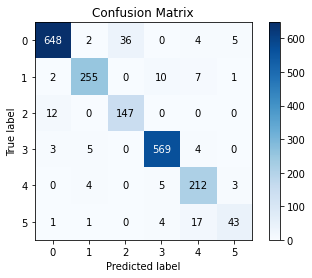

In [200]:
plot_confusion_matrix(Y_test,Y_pred)

In [201]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       695
           1       0.96      0.93      0.94       275
           2       0.80      0.92      0.86       159
           3       0.97      0.98      0.97       581
           4       0.87      0.95      0.91       224
           5       0.83      0.65      0.73        66

    accuracy                           0.94      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.94      0.94      0.94      2000



#Creating a Function to check for Your own Sentence

In [111]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
      if (val==value):
        return key



In [112]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(model.predict_classes(sentence_padded))
  print("The emotion predicted is",ans)

#Check for Your Own Sentence

In [173]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : haha love it
The emotion predicted is joy


In [176]:
predict(str(input('Enter a sentence : ')))


Enter a sentence :  i am really scared if ghosts
The emotion predicted is fear


In [180]:
predict(str(input('Enter a sentence : ')))


Enter a sentence : i am gonna punch you
The emotion predicted is anger
